Case Study: Predicting Home prices in California

In [1]:
import pandas
df = pandas.read_csv('data/cali_housing.csv')
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [2]:
len(df)

20640

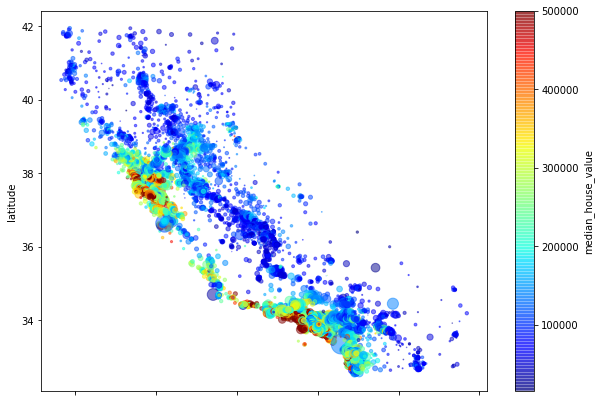

In [24]:
import seaborn
from matplotlib.pyplot import get_cmap
df.plot.scatter(x='longitude',y='latitude', figsize=(10,7), alpha=0.5, s = df.population/90, c = 'median_house_value', cmap=get_cmap('jet'))

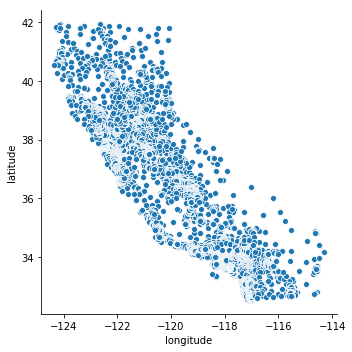

In [19]:
seaborn.relplot(x='longitude', y='latitude', data=df)

## Dealing with missing data

In [28]:
df.isnull().head()
#df.isnull().sum()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [29]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f22a5274978>]],
      dtype=object)

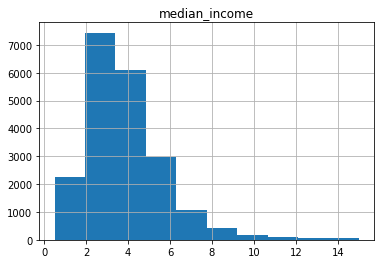

In [31]:
df[['median_income']].hist()

In [34]:
# Remove rows with missing total_bedrooms
df3 = df.drop('total_bedrooms', axis=1)
df3.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## Discretization of Continuous Data

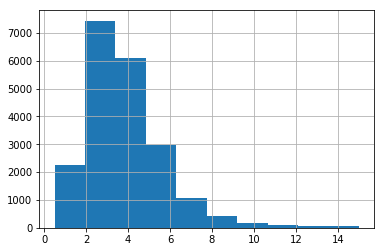

In [36]:
df.median_income.hist()

In [37]:
df.median_income.value_counts()

3.1250     49
15.0001    49
2.8750     46
4.1250     44
2.6250     44
3.8750     41
3.0000     38
3.3750     38
3.6250     37
4.0000     37
4.3750     35
2.1250     33
2.3750     32
4.6250     31
3.5000     30
3.2500     29
3.7500     29
4.8750     29
1.6250     29
2.2500     29
4.2500     28
2.5000     28
3.6875     26
2.7500     25
4.5000     24
2.5625     21
1.8750     21
5.0000     20
3.0625     19
4.4375     18
           ..
5.7780      1
1.3672      1
4.6420      1
2.5389      1
6.2113      1
2.1975      1
6.0591      1
2.1403      1
1.5161      1
4.0037      1
1.9306      1
4.0517      1
3.5082      1
5.2649      1
6.7744      1
4.0677      1
2.1216      1
4.1449      1
6.0808      1
5.6263      1
4.8283      1
2.5599      1
7.3031      1
2.7209      1
2.1630      1
4.1514      1
1.2614      1
2.0294      1
6.7079      1
3.7306      1
Name: median_income, Length: 12928, dtype: int64